There are different types of neural networks, each with its own architecture and characteristics. Some popular types of neural networks include:

Feedforward neural networks: Also known as multi-layer perceptrons, these are the simplest type of neural network. They consist of an input layer, one or more hidden layers, and an output layer. Data flows in one direction from the input layer through the hidden layers to the output layer.
Convolutional neural networks (CNNs): These are neural networks that are designed to process image data. They use convolutional layers, which scan the image with a filter and extract features from it, and pooling layers, which reduce the spatial dimensions of the image to make it more manageable.
Recurrent neural networks (RNNs): These are neural networks that are designed to process sequential data, such as time series or natural language. They use feedback connections, which allow the network to maintain a state and process data in a step-by-step fashion.
Autoencoder: Autoencoders are neural networks that are trained to reconstruct their inputs. They consist of an encoder and a decoder. The encoder maps the input to a lower-dimensional representation, and the decoder maps the representation back to the original input. Autoencoders are used for tasks such as dimensionality reduction, anomaly detection and feature learning.
Generative Adversarial Networks (GANs): GANs are neural networks that are used for generative modeling. They consist of two networks: a generator and a discriminator. The generator produces new samples, while the discriminator tries to distinguish the generated samples from real samples. The two networks are trained together in a game-like manner, where the generator tries to produce samples that can fool the discriminator, while the discriminator tries to correctly identify the generated samples.
Neural networks are trained using a large dataset and the process of adjusting the parameters of the network called backpropagation . The training process adjusts the weights of the network to minimize the difference between the predicted output and the actual output.

How Neural Network works —
The basic building block of a neural network is the artificial neuron, which consists of an input, a set of weights, a bias term, an activation function, and an output.

The input is the data that the neuron receives from the previous layer.
The weights are the parameters of the neuron that are used to adjust the strength of the input.
The bias term is a constant that is added to the weighted input.
The activation function is a mathematical function that is applied to the weighted input plus the bias term to produce the output of the neuron.
The output is the value that the neuron generates and passes on to the next layer.
The overall behavior of a neural network is determined by the architecture of the network, which is the number of layers and the number of neurons in each layer, and the values of the weights and biases.

The neural network is trained using a large dataset, where the input is presented to the network, and the output is compared to the desired output. The difference between the predicted output and the actual output is used to adjust the weights and biases of the network so that the network can make better predictions in the future. This process is called backpropagation.

During the training process, the network adjusts the weights and biases so that the difference between the predicted output and the actual output is minimized. Once the training is completed, the network can be used to make predictions on new, unseen data.

In summary, a neural network is a type of machine learning algorithm that is inspired by the structure and function of the human brain. Neural networks consist of layers of interconnected nodes called artificial neurons. The network is trained using a large dataset and the process of adjusting the parameters of the network called backpropagation. The training process adjusts the weights of the network to minimize the difference between the predicted output and the actual output.

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile
import numpy as np
from keras.preprocessing import image
import random
from keras.utils import img_to_array,load_img

In [2]:
train_horse_dir = os.path.join('./horse-or-human/train/horses')
train_human_dir = os.path.join('./horse-or-human/train/humans')
validation_horse_dir = os.path.join('./horse-or-human/validation/horses')
validation_human_dir = os.path.join('./horse-or-human/validation/humans')
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])
validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']
total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


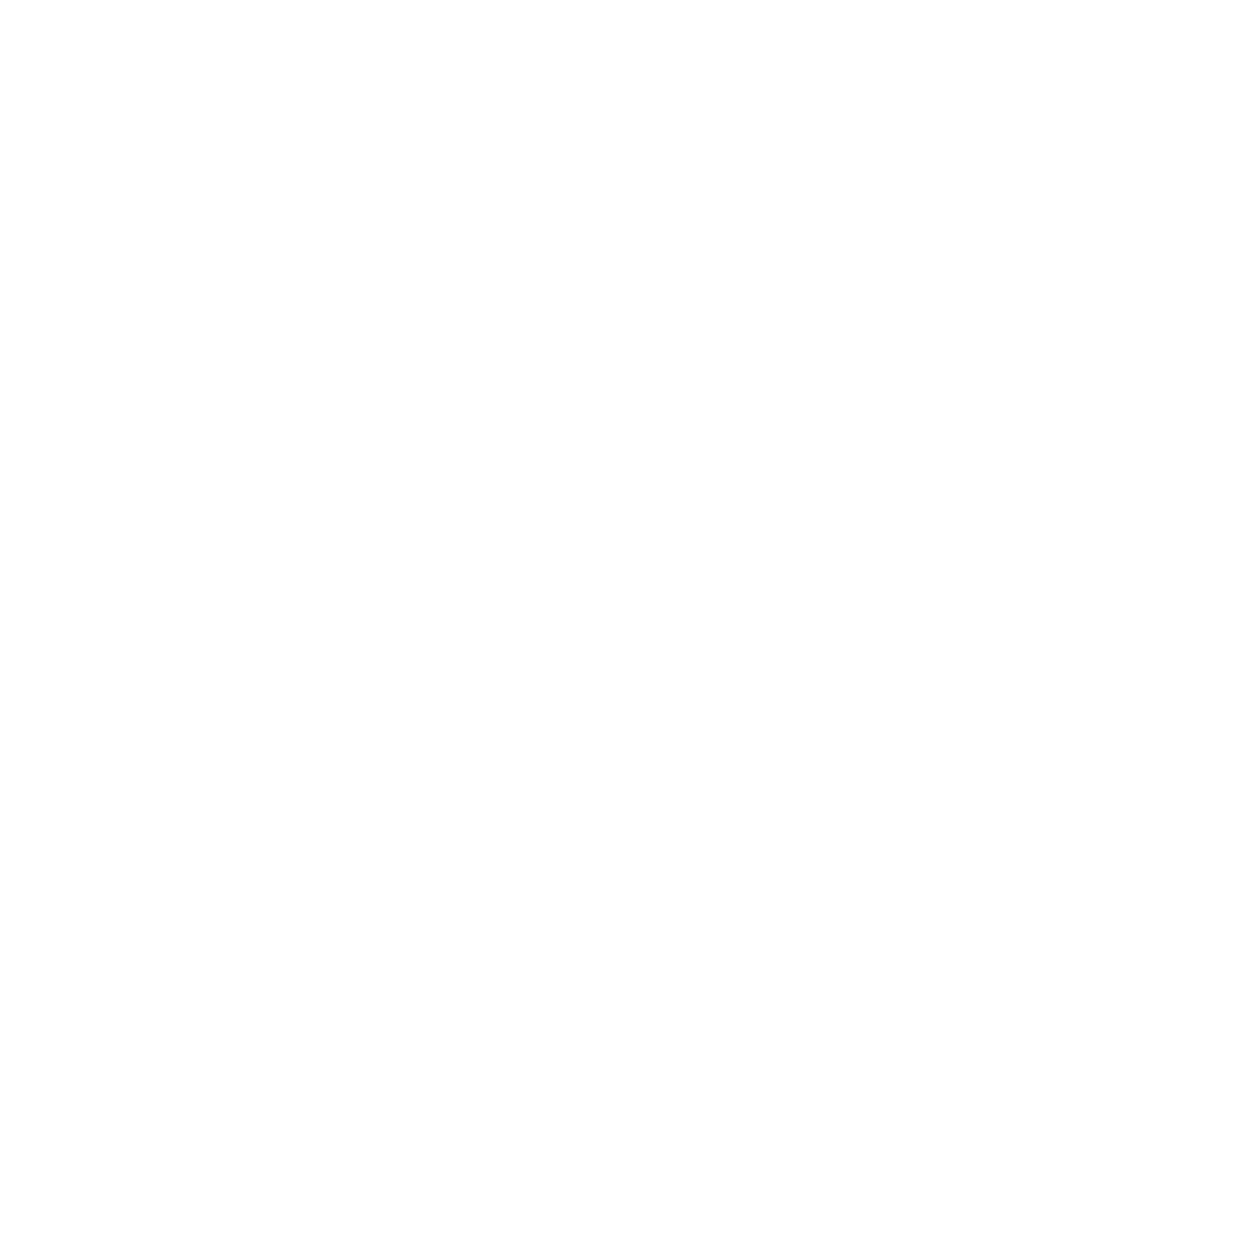

In [3]:
nrows = 4
ncols = 4
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

In [4]:
model = tf.keras.models.Sequential([
    # The input shape here is the desired size of the image 300x300 ( 3 bytes color )
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
    # The sixth convolution
     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # We have only 1 output neuron
    # and it will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

c:\App\python\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        directory=r'./horse-or-human/train/',  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        directory=r'./horse-or-human/validation/', 
        target_size=(300, 300), 
        batch_size=32,
        class_mode='binary')
history = model.fit(
      train_generator,
      steps_per_epoch= 8, 
      epochs= 15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 30s 4s/step - loss: 0.8615 - accuracy: 0.6429 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 43s 5s/step - loss: 0.5552 - accuracy: 0.7442 - val_loss: 0.8415 - val_accuracy: 0.7109
Epoch 3/15
8/8 [==============================] - 15s 2s/step - loss: 0.6032 - accuracy: 0.8065 - val_loss: 0.7855 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 0.2392 - accuracy: 0.9055 - val_loss: 1.0282 - val_accuracy: 0.8086
Epoch 5/15
8/8 [==============================] - 40s 5s/step - loss: 0.2966 - accuracy: 0.8776 - val_loss: 0.5241 - val_accuracy: 0.8516
Epoch 6/15
8/8 [==============================] - 40s 5s/step - loss: 0.1567 - accuracy: 0.9422 - val_loss: 0.8087 - val_accuracy: 0.8516
Epoch 7/15
8/8 [==============================] - 40s 5s/step - loss: 0.3380 - accuracy: 

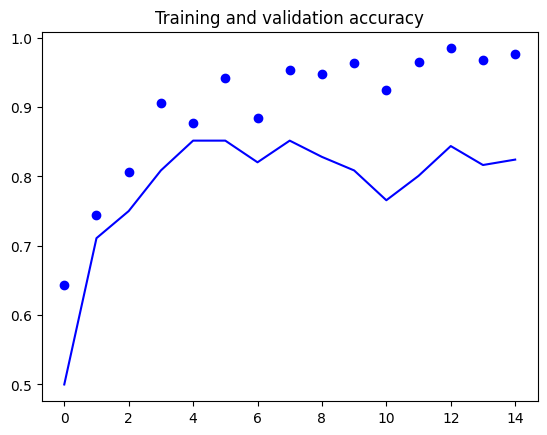

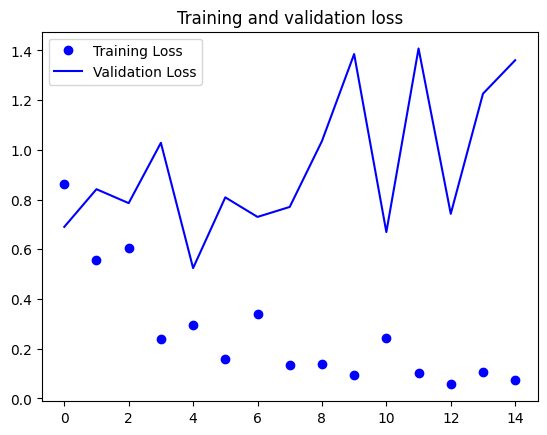

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()